In [1]:

!pip install yfinance
!pip install pmdarima

     |████████████████████████████████| 608 kB 5.3 MB/s eta 0:00:01


In [1]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf


In [2]:

import yfinance as yf
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error

In [3]:

#SPY = SP500
tickers = ['SPY', 'AAL', 'AMZN', 'PFE', 'DB', 'WMT']
start_date='2012-01-01'
end_date='2022-10-14'
snp = yf.download(tickers[0], start=start_date, end=end_date)
american = yf.download(tickers[1], start=start_date, end=end_date)
amazon = yf.download(tickers[2], start=start_date, end=end_date)
pfizer = yf.download(tickers[3], start=start_date, end=end_date)
d_bank = yf.download(tickers[4], start=start_date, end=end_date)
walmart = yf.download(tickers[5], start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:

snp = snp[["Adj Close"]]
snp.rename(columns={'Adj Close':'adj_close'}, inplace=True)
american = american[["Adj Close"]]
american.rename(columns={'Adj Close':'adj_close'}, inplace=True)
amazon = amazon[["Adj Close"]]
amazon.rename(columns={'Adj Close':'adj_close'}, inplace=True)
pfizer = pfizer[["Adj Close"]]
pfizer.rename(columns={'Adj Close':'adj_close'}, inplace=True)
d_bank = d_bank[["Adj Close"]]
d_bank.rename(columns={'Adj Close':'adj_close'}, inplace=True)
walmart = walmart[["Adj Close"]]
walmart.rename(columns={'Adj Close':'adj_close'}, inplace=True)

/var/folders/3y/lmdxykwd5c520jxdy0t_rw340000gn/T/ipykernel_93067/864954105.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart.rename(columns={'Adj Close':'adj_close'}, inplace=True)


In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')

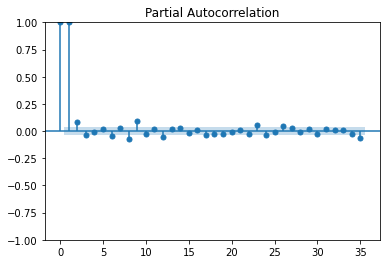

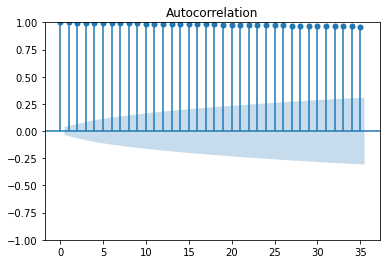

In [7]:
plot_pacf(snp);
plot_acf(snp);

In [8]:
ad_fuller_result = adfuller(snp.diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.651966276401742
p-value: 4.636422224907691e-19


In [ ]:

train = snp.iloc[:int(snp.shape[0]*0.8)]
test = snp.iloc[int(snp.shape[0]*0.8):]

In [19]:
from sklearn.model_selection import TimeSeriesSplit

In [25]:
mape_arima = []
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 3)
for train_index, valid_index in tscv.split(train):
    train_value, valid_value = train.iloc[train_index, :], train.iloc[valid_index, :]
    model = SARIMAX(train_value, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)
    # Fit the model 
    preds = model.predict(start=train_value.shape[0]+1, end = train_value.shape[0]+valid_value.shape[0])
    metrics = mean_absolute_percentage_error(preds, valid_value)
    print(metrics)
    mape_arima.append(metrics)

0.08743755785216295
0.2142660166895554
0.06490975100713173


In [26]:
mape_arima

[0.08743755785216295, 0.2142660166895554, 0.06490975100713173]

In [14]:
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)

In [15]:
preds = model.predict(start=train.shape[0]+1, end = train.shape[0]+test.shape[0])

In [16]:
preds = pd.DataFrame(preds)
preds.index = test.index

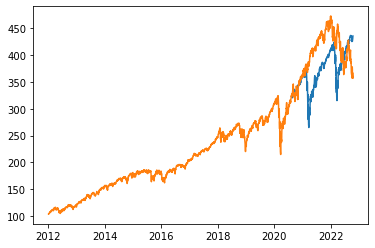

In [17]:
plt.plot(preds, label = 'prediction')
plt.plot(snp)

In [18]:
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

MSE: 2641.549
MSLE: 0.018
MAPE: 0.100
